In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import cobra
import pickle
import matplotlib.pyplot as plt

plt.rc('font', size=20)

# Load the metabolic RNA-seq dataset with adjusted TPM* scores and the RAS scores after these were integrated in Recon3D

In [2]:
# RNA-seq dataset
df_TPM = pd.read_csv('../Data/RNAseq_data_with_entrez_genes.csv',sep='\t')

# RAS scores calculated in MATLAB
df_RAS = pd.DataFrame(sp.io.loadmat('../Data/RAS_scores.mat')['RASmatrix'],columns=['PLC','Huh7'])
print('The full RAS matrix has length', len(df_RAS))

# Load on of our own reconstructed models including the lipid metabolism changes
model = cobra.io.load_json_model('../Models/Recon3DModel_301_patched.json')

# set df_RAS index to the gene IDs
l_rxns_full = [r.id for r in model.reactions]
df_RAS.index = l_rxns_full
df_RAS['name'] = df_RAS.apply(lambda row: model.reactions.get_by_id(row.name).name,axis=1)

# calculate fold-changes for RAS
df_RAS['Fold_change'] = df_RAS['PLC'] / df_RAS['Huh7']

# Export
df_RAS.to_csv('../Data/RAS_scores_annotated_with_Recon3D_ID_name.csv')

# drop empty RAS scores (i.e. reactions not linked to genes)
df_RAS = df_RAS[~df_RAS.PLC.isna()]
print(len(df_RAS),'reactions with a RAS score.')

# show
df_RAS.head(10)

The full RAS matrix has length 10601
5938 reactions with a RAS score.


,PLC,Huh7,name,Fold_change
13DAMPPOX,4.8500,6.72000,"1, 3-Diaminopropane:Oxygen Oxidoreductase (Dea...",0.721726
24_25VITD2Hm,72.2900,0.26000,24R-Vitamin D-25-Hydroxylase (D2),278.038462
24_25VITD3Hm,72.2900,0.26000,24R-Vitamin D-25-Hydroxylase (D3),278.038462
25VITD2Hm,3.1600,1.12000,1-Alpha-Vitamin D-25-Hydroxylase (D2),2.821429
25VITD3Hm,3.1600,1.12000,1-Alpha-Vitamin D-25-Hydroxylase (D3),2.821429
2AMACHYD,1.5500,0.58289,2-Aminoacrylate Hydrolysis,2.659164
2AMACSULT,0.6600,8.67000,2-Aminoacrylate Sulfotransferase,0.076125
2AMADPTm,0.5600,0.28000,L-2-Aminoadipate Shuttle (Cytosol/Mitochondria),2.000000
2HBO,1286.0404,978.77390,2-Hydroxybutyrate:NAD+ Oxidoreductase,1.313930
2HBt2,70.0800,411.50000,2-Hydroxybutyrate Symport with Proton,0.170304


# Comparing the spread in the TPM and RAS ratio distributions

In [3]:
print('Means:',df_TPM['Fold_change'].mean(), df_RAS['Fold_change'].mean())
print('Medians:',df_TPM['Fold_change'].median(), df_RAS['Fold_change'].median())
print('Standard deviation:',df_TPM['Fold_change'].std(), df_RAS['Fold_change'].std())

Means: 11.562012604369253 2.425549637674995
Medians: 0.9653236840617403 1.050639136881754
Standard deviation: 177.14813104405576 13.696220163559255


# Find most differentially expressed reactions based on RAS

In [4]:
factor = 100
df_RAS_filtered = df_RAS[(df_RAS['Fold_change'] >= factor) | (df_RAS['Fold_change'] <= 1/factor)]
print('There are ', len(df_RAS_filtered), 'reactions with a fold-change of at least', factor)

df_RAS_filtered.to_excel('../Tables/RAS_outliers.xlsx')
df_RAS_filtered

There are  92 reactions with a fold-change of at least 100


,PLC,Huh7,name,Fold_change
24_25VITD2Hm,72.29000,0.2600,24R-Vitamin D-25-Hydroxylase (D2),278.038462
24_25VITD3Hm,72.29000,0.2600,24R-Vitamin D-25-Hydroxylase (D3),278.038462
A4GALTc,8.27000,0.0700,Lactosylceramide 4-Alpha-Galactosyltransferase,118.142857
A4GALTg,8.27000,0.0700,Lactosylceramide 4-Alpha-Galactosyltransferase,118.142857
ACSRTNMT,0.19000,135.8238,S-Adenosyl-L-Homocysteine:N-Acetylserotonin O-...,0.001399
ADPRIBt,0.08000,14.2300,ADPribose Transport,0.005622
ALADGLNexR,0.86000,107.8300,L-Alanine/Glutamine Reversible Antiport,0.007976
ALADGLYexR,0.86000,107.8300,D-Alanine/Glycine Reversible Antiport,0.007976
ALAGLNexR,0.86000,107.8300,L-Alanine/Glutamine Reversible Antiport,0.007976
ALAGLYexR,0.86000,107.8300,L-Alanine/Glycine Reversible Antiport,0.007976


# Plot RAS and RNA-seq in 2D for the cell lines + distribution of fold-change

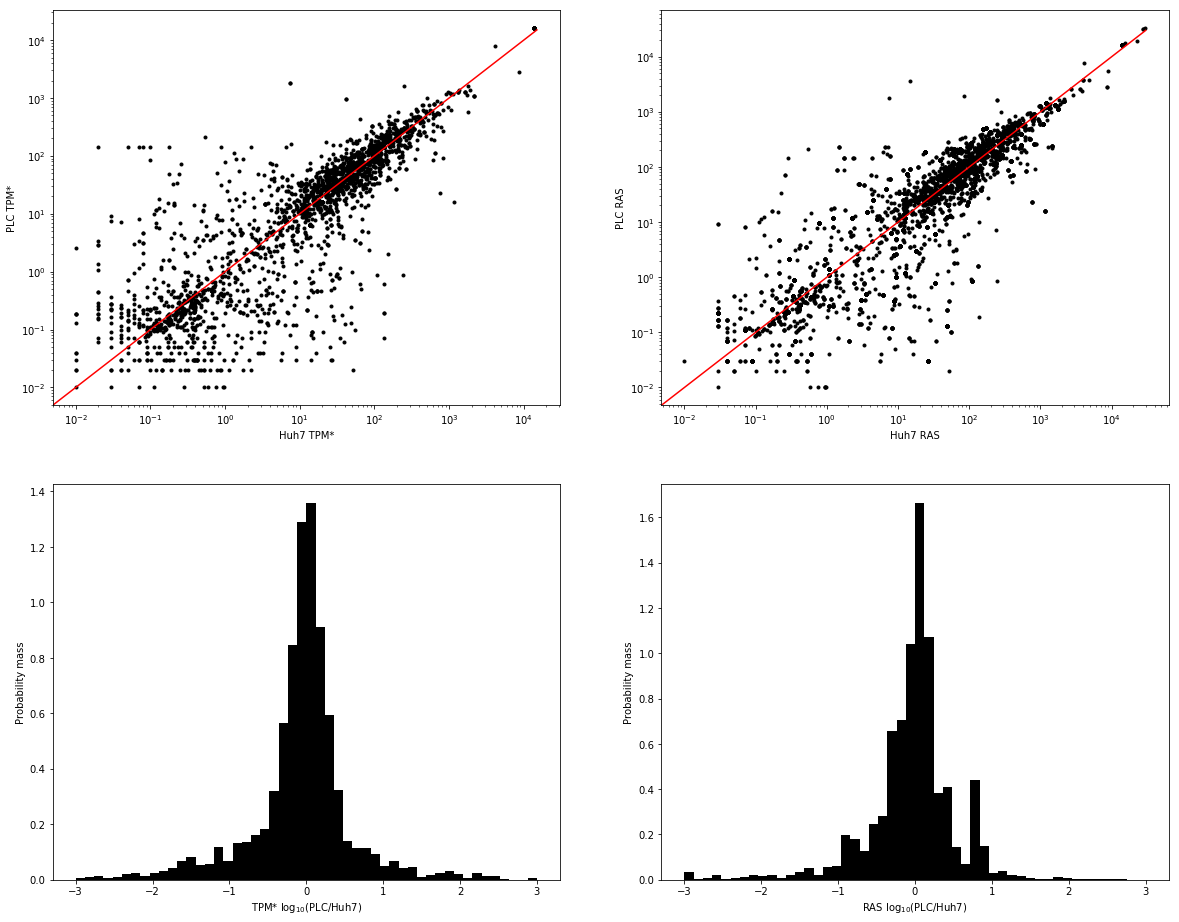

In [5]:
fig,ax = plt.subplots(2,2)
fig.set_size_inches(20,16)

# 2D TPM* scores
ax[0,0].plot(df_TPM.Huh7, df_TPM.PLC,'.k',)
v = 1.5*np.array(range(10**4))
ax[0,0].plot(v, v,'-r')
ax[0,0].set_xscale('log'); ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Huh7 TPM*')
ax[0,0].set_ylabel('PLC TPM*')

ax[0,1].plot(df_RAS.Huh7, df_RAS.PLC,'.k',)
v = 3*np.array(range(10**4))
ax[0,1].plot(v, v,'-r')
ax[0,1].set_xscale('log'); ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('Huh7 RAS')
ax[0,1].set_ylabel('PLC RAS')

ax[1,0].hist(np.log10(df_TPM['Fold_change'].values),bins=50, normed=True, range=(-3,3),color='k') 
ax[1,0].set_xlabel(r'TPM* $\log_{10}$(PLC/Huh7)')
ax[1,0].set_ylabel('Probability mass')

ax[1,1].hist(np.log10(df_RAS['Fold_change'].values),bins=50, normed=True, range=(-3,3),color='k') 
ax[1,1].set_xlabel(r'RAS $\log_{10}$(PLC/Huh7)')
ax[1,1].set_ylabel('Probability mass')

fig.savefig('../Figures/TPM_and_RAS_comparison.png',bbox_inches = 'tight',dpi=300)
plt.show()